# Twitter Sentiment Analysis

In [1]:
# importing libraries and packages
import snscrape.modules.twitter as sntwitter
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import seaborn as sns

from datetime import datetime
import nltk
nltk.download('punkt')
from textblob import TextBlob #library for processing textual data
from wordcloud import WordCloud, STOPWORDS #graphical representation of word frequencies
from PIL import Image 
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to /Users/raghu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


 ### Capture user inputs

In [5]:
keyword = input("Please enter keyword or hashtag to search: ")
NoOfTweets = int(input ("Please enter how many tweets to analyze: "))
from_date_as_str = str(input("Please enter initial date for query (yyyy-mm-dd): "))
initial_date = datetime.strptime(from_date_as_str, "%Y-%m-%d")
end_date_as_str = str(input("Please enter end date for query (yyyy-mm-dd): "))
end_date = datetime.strptime(end_date_as_str, "%Y-%m-%d")

### Call scraper function

#### Initialize variables, and utility function

In [6]:
# calculates percentage
def percentage(part,whole):
    return 100 * float(part)/float(whole)

# positive  = 0
# negative = 0
# neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

In [7]:
for i,tweet in enumerate(sntwitter.TwitterSearchScraper(keyword + ' since:' + (from_date_as_str) + ' until:' + end_date_as_str).get_items()):
    if i== NoOfTweets:
        break
    tweet_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.lang])
    analysis = TextBlob(tweet.content)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.content)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.content)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.content)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.content)
        neutral += 1

positive = percentage(positive, NoOfTweets)
negative = percentage(negative, NoOfTweets)
neutral = percentage(neutral, NoOfTweets)
polarity = percentage(polarity, NoOfTweets)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [8]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Language'])
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  15
positive number:  4
negative number:  2
neutral number:  9


In [9]:
tweet_list

,Datetime,Tweet Id,Text,Username,Language
0,2022-11-30 23:59:58+00:00,1598104582236041217,"Dependable, polite driver in #Doha: Faruk at +...",SEATheatreGrrl,en
1,2022-11-30 23:59:57+00:00,1598104579144663040,Mundial de Qatar: el triunfo de Argentina enlo...,ViaUshuaiaComAr,es
2,2022-11-30 23:59:57+00:00,1598104578763128832,@Dav3yAvFc @TyroneMings @AVFCOfficial Looking ...,DDrake666,en
3,2022-11-30 23:59:55+00:00,1598104571326652417,@JoccoNine @ExplicateurSDM @SavoirDuMonde Le t...,samots1,fr
4,2022-11-30 23:59:54+00:00,1598104567673409537,@Quicktake It will take Qatar just over a year...,LawrenceCrimmi1,en
5,2022-11-30 23:59:54+00:00,1598104564271841280,MY FIRST 12 HOURS IN QATAR FOR THE WORLD CUP: ...,DonnieDoesWorld,en
6,2022-11-30 23:59:53+00:00,1598104563331911680,"Che @budweiser_ar no me queres llevar a Qatar,...",caamiborre,es
7,2022-11-30 23:59:52+00:00,1598104559263526913,🇦🇷 Argentina se impuso este miércoles ante Pol...,RadioDelzur,es
8,2022-11-30 23:59:52+00:00,1598104557384785920,Esta cuenta banca hasta el fin de los dias a A...,gaston_urbina,es
9,2022-11-30 23:59:52+00:00,1598104556361351168,@panamarhradio Although Hijab is enforced in I...,heila000,en


In [12]:
# unique languages within tweets
tweet_list.Language.unique()

array(['en', 'es', 'fr'], dtype=object)

In [13]:
# value count for unique languages in collected tweets
np.array(np.unique(tweet_list.Language, return_counts=True)).T

array([['en', 5],
       ['es', 8],
       ['fr', 2]], dtype=object)

In [108]:
# only select tweet language is english
tweet_list = tweet_list[tweet_list['Language']=='en']

In [110]:
#cleaning the text
#Find patterns like @ mentions with re and remove that
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

def cleanText (text, remove_stopwords: bool):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #the r in front tells python that the expression is a raw string
  text = re.sub(r'#', '', text) #this removes the hashtag sign
  text = re.sub(r'RT[\s]+', '', text) #removing retweet subleaf 
  text = re.sub(r'https?:\/\/\S+', '', text) #removing the hyperlink
  text = emoji_pattern.sub(r'', text)
  stopWords = nltk.corpus.stopwords.words("english")
  #adding more stopwords for cleaner data based on context
  stopWords = stopWords + ["n't"]#+ keyword.split()
  # remove stopwords
  if remove_stopwords:
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopWords]
        # 3. join back together
        text = " ".join(tokens)
        # return text in lower case and stripped of whitespaces
        text = text.lower().strip()
  return text

tweet_list['Clean Text'] = tweet_list['Text'].apply(cleanText, remove_stopwords=True) #applying the function to the dataframe


<ipython-input-110-3c20daaa655a>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_list['Clean Text'] = tweet_list['Text'].apply(cleanText, remove_stopwords=True) #applying the function to the dataframe


In [111]:
# head
tweet_list.head

<bound method NDFrame.head of                     Datetime             Tweet Id  \
0  2022-05-01 23:59:58+00:00  1520915966883999744   
1  2022-05-01 23:59:56+00:00  1520915959883649024   
2  2022-05-01 23:59:56+00:00  1520915957161488384   
3  2022-05-01 23:59:55+00:00  1520915953940414466   
4  2022-05-01 23:59:53+00:00  1520915947304980481   
5  2022-05-01 23:59:53+00:00  1520915945996394496   
6  2022-05-01 23:59:52+00:00  1520915941374062592   
7  2022-05-01 23:59:51+00:00  1520915938782162954   
8  2022-05-01 23:59:51+00:00  1520915937649737728   
9  2022-05-01 23:59:51+00:00  1520915937469292545   
10 2022-05-01 23:59:51+00:00  1520915936441688068   
11 2022-05-01 23:59:50+00:00  1520915935393206272   
12 2022-05-01 23:59:50+00:00  1520915934608863232   

                                                 Text        Username  \
0     Evil = @KremlinRussia_E https://t.co/LWDnTRIHrB      DeanHalter   
1   Russia’s highest-ranking general dodges Ukrain...     SeddikZekri   
2   @Mag

In [112]:
# Create new df with only cleaned text
# Dropping 'Datetime', 'Tweet Id', 'Text','Rendered Text', 'Username', 'Language'"
tweet_df = pd.DataFrame(tweet_list['Clean Text'])
tweet_df.head()

,Clean Text
0,evil = _e
1,russia ’ highest-ranking general dodges ukrain...
2,", saying trump made king united states life ru..."
3,_osmanjelle russia send 500k people finland su...
4,read whole thread…putins war fools folly ! ’ g...


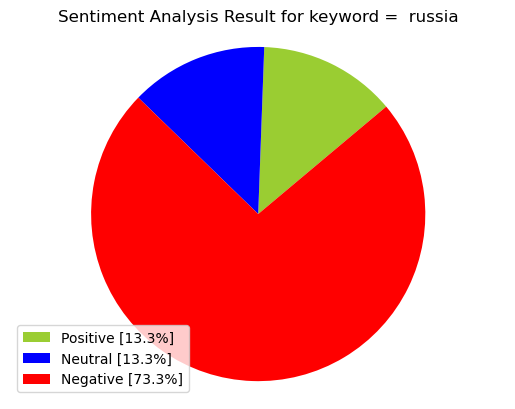

In [113]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=400)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword =  "+keyword+"" )
plt.axis('equal')
plt.show()

In [114]:
#Calculating Negative, Positive, Neutral and Compound values

tweet_df[['polarity', 'subjectivity']] = tweet_df['Clean Text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweet_list['Text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tweet_df.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tweet_df.loc[index, 'sentiment'] = "positive"
    else:
        tweet_df.loc[index, 'sentiment'] = "neutral"
    tweet_df.loc[index, 'neg'] = neg
    tweet_df.loc[index, 'neu'] = neu
    tweet_df.loc[index, 'pos'] = pos
    tweet_df.loc[index, 'compound'] = comp

tweet_df.head(10)

,Clean Text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,evil = _e,-1.000000,1.000000,negative,0.595,0.405,0.000,-0.6597
1,russia ’ highest-ranking general dodges ukrain...,-0.175000,0.600000,negative,0.205,0.795,0.000,-0.4767
2,", saying trump made king united states life ru...",0.000000,0.000000,positive,0.000,0.882,0.118,0.4215
3,_osmanjelle russia send 500k people finland su...,0.375000,0.750000,negative,0.168,0.734,0.098,-0.3818
4,read whole thread…putins war fools folly ! ’ g...,-0.075000,0.500000,negative,0.396,0.604,0.000,-0.8883
5,russia bombed building yet ? mean even got ? o...,-0.239583,0.468750,negative,0.117,0.883,0.000,-0.3939
6,watch fox honestly never heard oan . far pulli...,0.050000,0.683333,negative,0.127,0.822,0.051,-0.3404
7,visited kyiv several days going russia . discu...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,imagine elected prime minister solidify connec...,-0.300000,0.200000,negative,0.258,0.742,0.000,-0.9493
9,ap blame russia harassing `` opposition leader...,0.800000,0.700000,negative,0.353,0.479,0.168,-0.4767


In [115]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tweet_list_negative = tweet_df[tweet_df["sentiment"]=="negative"]
tweet_list_positive = tweet_df[tweet_df["sentiment"]=="positive"]
tweet_list_neutral = tweet_df[tweet_df["sentiment"]=="neutral"]


In [116]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [117]:
#Count_values for sentiment
count_values_in_column(tweet_df,"sentiment")

,Total,Percentage
negative,10,76.92
positive,2,15.38
neutral,1,7.69


<AxesSubplot:xlabel='sentiment'>

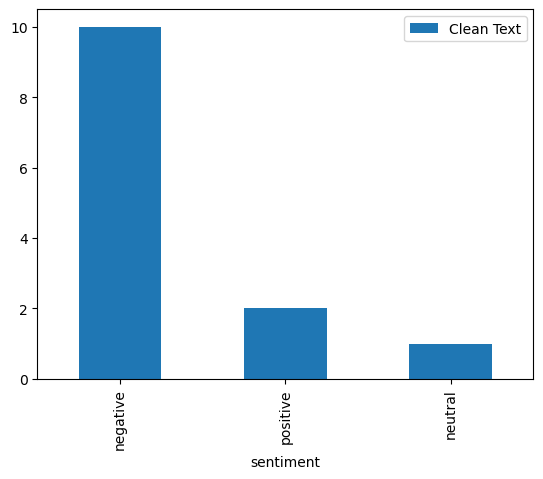

In [121]:
# Plot of sentiment
tweet_plot=tweet_df[['Clean Text','sentiment']]
tweet_plot.groupby('sentiment').count().sort_values(by='Clean Text', ascending=False).plot(kind='bar')

In [20]:
#Function to Create Wordcloud

def create_wordcloud(text):
    #mask = np.array(Image.open("cloud.png"))
    stopWords = nltk.corpus.stopwords.words("english")
    #adding more stopwords for cleaner data based on context
    stopWords = stopWords + keyword.split()
    stopwords = set(stopWords)
    wc = WordCloud(background_color="white",
                  #mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    plt.imshow(wc, interpolation = "bilinear")
    plt.axis('off')
    plt.show()
    #wc.to_file("wc.png")
    #print("Word Cloud Saved Successfully")
    #path="wc.png"
    #display(Image.open(path))

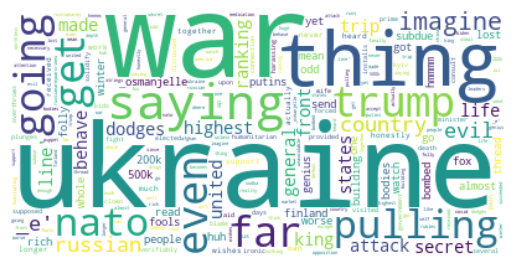

In [122]:
#Creating wordcloud for all tweets
create_wordcloud(tweet_df["Clean Text"].values)

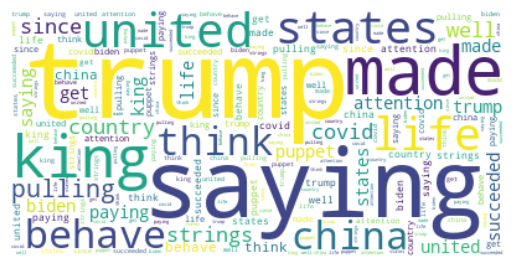

In [123]:
#Creating wordcloud for positive sentiment
create_wordcloud(tweet_list_positive["Clean Text"].values)

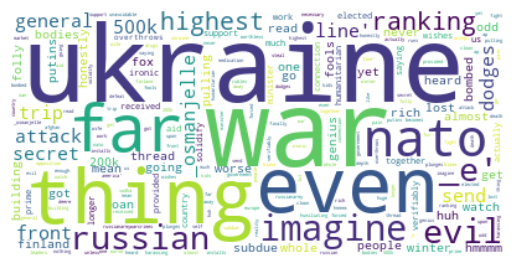

In [124]:
#Creating wordcloud for negative sentiment
create_wordcloud(tweet_list_negative["Clean Text"].values)

## Normalization

In [125]:
#get stop list
stopWords = nltk.corpus.stopwords.words("english")
#adding more stopwords for cleaner data based on context
stopWords = stopWords + keyword.split()
stopWords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [126]:
# tokenize tweet content
tweetTokens = nltk.word_tokenize(tweet_list['Clean Text'].to_string().replace('\n',''))
# cleanedTokens
cleanedTokens = [word.lower() for word in tweetTokens if word[0].isalpha()]
# No of tokens
len(tweetTokens)
# tokens in data 

119

In [127]:
# unique words
len(set(cleanedTokens))

74

In [128]:
cleanedStoppedTokens = [word for word in cleanedTokens if word not in stopWords]
len(set(cleanedStoppedTokens))
# No of tokens in data not including stop words

72

In [129]:
#1) Create a lemmatized version of cleanedStoppedTokens and count the unique lemmas. 

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

wnl = WordNetLemmatizer()
cleanedTokensLemmas = [wnl.lemmatize(word) for word in cleanedStoppedTokens]
len(set(cleanedTokensLemmas))

[nltk_data] Downloading package wordnet to /Users/raghu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


72

In [130]:
nltk.download('stopwords')

#2) Re-do the lemmatization after stopping words against the default NLTK stoplist, 
#and tabulate the top ten words. Paste the code and output.

#get stop list
#stopWords = nltk.corpus.stopwords.words("english")
#adding: could, would, upon and yet
#stopWords = stopWords + [keyword]

#add words and lemmatize from cleanedTokens if they're not in stopwords list
tweetCleanedStoppedLemmas = [wnl.lemmatize(word) for word in cleanedTokens if word not in stopWords]

#Freq Dist & tabulate
tweetCleanedStoppedLemmasFQ = nltk.FreqDist(tweetCleanedStoppedLemmas)
tweetCleanedStoppedLemmasFQ.tabulate(10)

           even            evil highest-ranking         general           dodge          ukrain          saying           trump            made            king 
              2               1               1               1               1               1               1               1               1               1 


[nltk_data] Downloading package stopwords to /Users/raghu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## TF-IDF

In [30]:
def tokenize(text):
    tokens = word_tokenize(text)
    stems = []
    for item in tokens: stems.append(PorterStemmer().stem(item))
    return stems

# corpus
text = tweetCleanedStoppedLemmas
# word tokenize and stem
#text = [" ".join(tokenize(txt.lower())) for txt in text]
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(text).todense()
# transform the matrix to a pandas df
matrix = pd.DataFrame(matrix, columns=vectorizer.get_feature_names())
# sum over each document (axis=0)
top_words = matrix.sum(axis=0).sort_values(ascending=False)

In [31]:
#Freq Dist & tabulate
top_words

ukraine         109.694527
war              52.582367
putin            39.811755
russian          35.000000
like             33.000000
                   ...    
over              0.707107
countries         0.707107
healthy           0.595623
presentation      0.592589
writeup           0.592589
Length: 2271, dtype: float64

<AxesSubplot:>

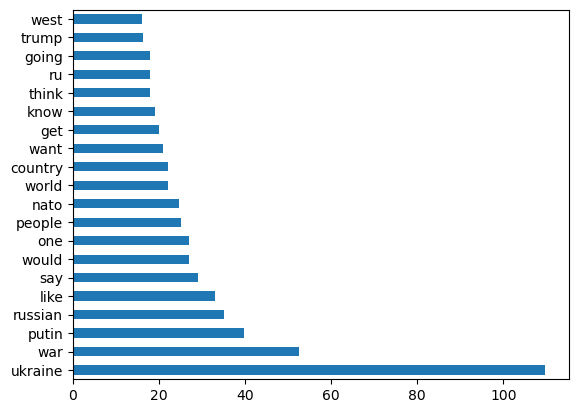

In [32]:
top_words[:20].plot(kind='barh')

### POS Tagging

In [33]:
import nltk
nltk.download('averaged_perceptron_tagger')

tweets_tagged = nltk.pos_tag(cleanedStoppedTokens)
tweet_df = pd.DataFrame(tweets_tagged, columns=['word', 'pos'])
tweet_df

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/raghu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,word,pos
0,evil,RB
1,highest-ranking,JJ
2,general,JJ
3,dodges,NNS
4,ukrain,VBP
...,...,...
4595,russians,NNS
4596,cry,VBP
4597,courchevel,JJ
4598,meet,NN


<AxesSubplot:xlabel='pos'>

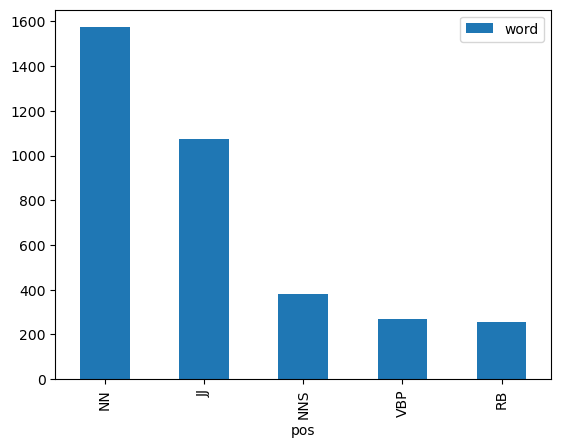

In [34]:
(tweet_df.groupby('pos')
  .count()
  .sort_values(by='word', ascending=False)
  .head(5).plot(kind='bar'))

## Classification of sentiment using SVM and Logistic Regression (using TF-IDF Vectorizer)
### SVM 

In [35]:
# splitting data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(tweet_list['Text'], tweet_list['sentiment'], test_size=0.20, random_state=30)
print('Train: ', X_train.shape,Y_train.shape,'Test: ',(X_test.shape,Y_test.shape))

Train:  (680,) (680,) Test:  ((171,), (171,))


In [36]:
print('TFIDF Vectorizer……')
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

TFIDF Vectorizer……


In [37]:
# Implementing SVM with sklearn for classification
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)

In [38]:
# Fitting the Training data into model
clf.fit(tf_x_train,Y_train)

LinearSVC(random_state=0)

In [39]:
# Predicting the Test data
y_test_pred=clf.predict(tf_x_test)

In [40]:
# Analyzing the results
from sklearn.metrics import classification_report, confusion_matrix
report=classification_report(Y_test, y_test_pred,output_dict=True)

In [41]:
# report summary
report

{'negative': {'precision': 0.6173913043478261,
  'recall': 0.797752808988764,
  'f1-score': 0.696078431372549,
  'support': 89},
 'neutral': {'precision': 0.46153846153846156,
  'recall': 0.3157894736842105,
  'f1-score': 0.37499999999999994,
  'support': 19},
 'positive': {'precision': 0.5581395348837209,
  'recall': 0.38095238095238093,
  'f1-score': 0.45283018867924524,
  'support': 63},
 'accuracy': 0.5906432748538012,
 'macro avg': {'precision': 0.5456897669233363,
  'recall': 0.49816488787511853,
  'f1-score': 0.5079695400172647,
  'support': 171},
 'weighted avg': {'precision': 0.5782447225372029,
  'recall': 0.5906432748538012,
  'f1-score': 0.5707852764850836,
  'support': 171}}

In [42]:
print(classification_report(y_test_pred,Y_test))

              precision    recall  f1-score   support

    negative       0.80      0.62      0.70       115
     neutral       0.32      0.46      0.37        13
    positive       0.38      0.56      0.45        43

    accuracy                           0.59       171
   macro avg       0.50      0.55      0.51       171
weighted avg       0.66      0.59      0.61       171



In [43]:
confusion_matrix(y_test_pred,Y_test)

array([[71,  7, 37],
       [ 5,  6,  2],
       [13,  6, 24]])

### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [45]:
# Fit the Training data to the model
lr.fit(tf_x_train,Y_train)

LogisticRegression()

In [46]:
# Predicting the test data
y_test_pred=lr.predict(tf_x_test)

In [47]:
# analyzing report
from sklearn.metrics import classification_report
report_log=classification_report(Y_test, y_test_pred,output_dict=True)
report_log

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'negative': {'precision': 0.5845070422535211,
  'recall': 0.9325842696629213,
  'f1-score': 0.7186147186147187,
  'support': 89},
 'neutral': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 19},
 'positive': {'precision': 0.5517241379310345,
  'recall': 0.25396825396825395,
  'f1-score': 0.3478260869565217,
  'support': 63},
 'accuracy': 0.5789473684210527,
 'macro avg': {'precision': 0.37874372672818524,
  'recall': 0.39551750787705836,
  'f1-score': 0.3554802685237468,
  'support': 171},
 'weighted avg': {'precision': 0.5074839032176525,
  'recall': 0.5789473684210527,
  'f1-score': 0.5021623007893031,
  'support': 171}}

In [48]:
print(classification_report(y_test_pred,Y_test))
print(report_log)

              precision    recall  f1-score   support

    negative       0.93      0.58      0.72       142
     neutral       0.00      0.00      0.00         0
    positive       0.25      0.55      0.35        29

    accuracy                           0.58       171
   macro avg       0.40      0.38      0.36       171
weighted avg       0.82      0.58      0.66       171

{'negative': {'precision': 0.5845070422535211, 'recall': 0.9325842696629213, 'f1-score': 0.7186147186147187, 'support': 89}, 'neutral': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 19}, 'positive': {'precision': 0.5517241379310345, 'recall': 0.25396825396825395, 'f1-score': 0.3478260869565217, 'support': 63}, 'accuracy': 0.5789473684210527, 'macro avg': {'precision': 0.37874372672818524, 'recall': 0.39551750787705836, 'f1-score': 0.3554802685237468, 'support': 171}, 'weighted avg': {'precision': 0.5074839032176525, 'recall': 0.5789473684210527, 'f1-score': 0.5021623007893031, 'support': 171}}


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
confusion_matrix(y_test_pred,Y_test)

array([[83, 12, 47],
       [ 0,  0,  0],
       [ 6,  7, 16]])